In [8]:
!pip install PSAW

In [9]:
import pandas as pd

import numpy as np

#we will need datetime in order to specify the timeline we need to collect the data
import datetime as dt

#now we import the wrapper in order to use the API
from psaw import PushshiftAPI

api = PushshiftAPI()

In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20,'figure.figsize':(10,8)})

In [5]:
#mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#API 

Have you heard of Game Stop or r/wallsteetbets? Basically, a bunch of redditors decided to buy a lot of stock in Game Stop - a brick and mortar gaming company. Game Stop's stock had been on the decline. The redditors heard about a hedge fund company that had shorted Game Stop's stock (see [this story](https://abcnews.go.com/Business/gamestop-timeline-closer-saga-upended-wall-street/story?id=75617315) for details). 

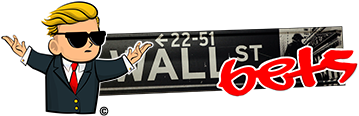


Now, one of the interesting twists in [this saga came when Robin Hood](https://www.prweek.com/article/1705984/timeline-crisis-r-wallstreetbets-gamestop) (interactive brokerage company), on January 28th, decided to halt trading on Game Stop and few other stocks. 

We want to analyze the discussions on the r/wallstreetbets on January 28th between 11 am and 11:10 EST (10 minutes). It is imporant to note that the system stores data using GMT timestamps. So, you will have to take the time difference into account when writing your code. You can check time differences [here](https://savvytime.com/converter/gmt-to-est).

##Q1a. Using PSAW reddit API wrapper, collect all the comments from the subreddit between 11 am and 11:10 am (10 minutes) on January 28th. 

##After you collect the data, save it to a Dataframe called df

##Finally, save the DataFrame as a json file titled 'wallstreetebetssub.json'

##[10 points]

[This should take around 8 minutes]

In [11]:
#A1a. (4:00-4:10PM GMT : 16:00-16:10)
import os
import glob

subreddit_name = 'wallstreetbets'
end_time = int(10)

subredditlist = [subreddit_name]
for reddit in subredditlist:
    for y in range(0 ,int(end_time)+1):
        file_name= str(reddit)+"_"+str(y)+".json"
        print("starting with minute "+str(y))
        print("for subreddit..."+str(reddit))
        print("setting start epoch and end epoch...")
        start_epoch=int(dt.datetime(2021, 1, 28, 16, 0).timestamp())
        end_epoch = int(dt.datetime(2021, 1, 28, 16, y).timestamp())
        print("setting up the generator...")
        gen = api.search_comments(after=start_epoch, before=end_epoch, subreddit=reddit)
        print("setting up the dataframe...")
        df = pd.DataFrame([obj.d_ for obj in gen])
        print("The number of comments at minute "+ str(y)+" is "+str(len(df.index)))
        df.to_json(file_name)

#get current working directory (CWD)
cwd = os.getcwd()
#create an empty list to add things to it
contents = []
#json_dir_name becomes the current working directory
json_dir_name = cwd
# Again, we want to find all the files that start with [wallstreetbets AND end with .json]
json_pattern = os.path.join(json_dir_name, 'wallstreetbets*.json')
file_list = glob.glob(json_pattern)
for file in file_list:
    contents.append(file)

df = pd.DataFrame()
for file in contents:
    print('reading...')
    print(file)
    tmp_frame = pd.read_json(file)
    df = df.append(tmp_frame, ignore_index=True)

df.to_json('wallstreetebetssub.json')

starting with minute 0
for subreddit...wallstreetbets
setting start epoch and end epoch...
setting up the generator...
setting up the dataframe...
The number of comments at minute 0 is 0
starting with minute 1
for subreddit...wallstreetbets
setting start epoch and end epoch...
setting up the generator...
setting up the dataframe...


/usr/local/lib/python3.6/dist-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 522
  warnings.warn("Got non 200 code %s" % response.status_code)
/usr/local/lib/python3.6/dist-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


The number of comments at minute 1 is 2000
starting with minute 2
for subreddit...wallstreetbets
setting start epoch and end epoch...
setting up the generator...
setting up the dataframe...
The number of comments at minute 2 is 4000
starting with minute 3
for subreddit...wallstreetbets
setting start epoch and end epoch...
setting up the generator...
setting up the dataframe...
The number of comments at minute 3 is 6000
starting with minute 4
for subreddit...wallstreetbets
setting start epoch and end epoch...
setting up the generator...
setting up the dataframe...


/usr/local/lib/python3.6/dist-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 525
  warnings.warn("Got non 200 code %s" % response.status_code)


The number of comments at minute 4 is 8100
starting with minute 5
for subreddit...wallstreetbets
setting start epoch and end epoch...
setting up the generator...
setting up the dataframe...
The number of comments at minute 5 is 10300
starting with minute 6
for subreddit...wallstreetbets
setting start epoch and end epoch...
setting up the generator...
setting up the dataframe...
The number of comments at minute 6 is 12300
starting with minute 7
for subreddit...wallstreetbets
setting start epoch and end epoch...
setting up the generator...
setting up the dataframe...
The number of comments at minute 7 is 14300
starting with minute 8
for subreddit...wallstreetbets
setting start epoch and end epoch...
setting up the generator...
setting up the dataframe...
The number of comments at minute 8 is 16300
starting with minute 9
for subreddit...wallstreetbets
setting start epoch and end epoch...
setting up the generator...
setting up the dataframe...
The number of comments at minute 9 is 18400
st

##Q1b. How many comments did you collect? What is the shape of the DataFrame? [5 points]

In [12]:
#A1b.
print("The number of comments collected is %d" % len(df))
print("This is the shape of the DataFrame BEFORE the CLEAN:")
print(df.shape)
print("=============================")
# Cleaning Process
new_columns = ['author','created_utc','id','parent_id','link_id','body','score','permalink']
df2 = df[new_columns]
print("This is the shape of the DataFrame AFTER the CLEAN:")
print(df2.shape)
df2['created_utc'] = pd.to_datetime(df2['created_utc'],unit='s')

The number of comments collected is 112600
This is the shape of the DataFrame BEFORE the CLEAN:
(112600, 38)
This is the shape of the DataFrame AFTER the CLEAN:
(112600, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


##Q1c. Using a box plot, show the distribution of scores in these comments [5 points]

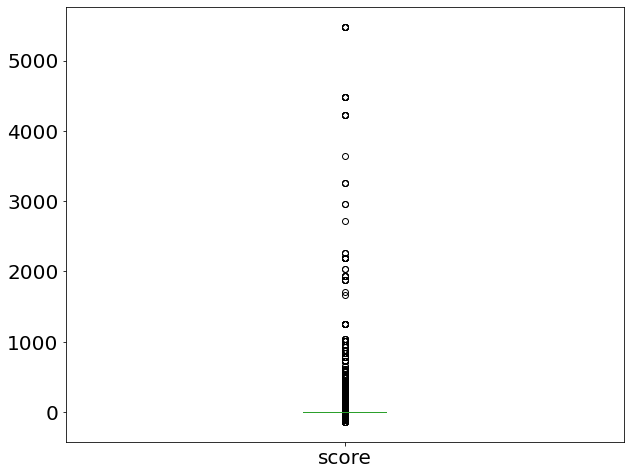

In [14]:
#A1c.
df2['score'].plot(kind='box')

#PCA

For this question, you will be working with the Midophonis Subreddit dataset. The dataset can be accessed [here](https://drive.google.com/file/d/1acqdEWJOnB6HC3v9Mzz47FSAzQwsuSoc/view?usp=sharing). The dataset is represents users in the [r/misophonia subreddit](https://www.reddit.com/r/misophonia/). 

Misophonia is a neurophysiological disorder in which sufferers face an aversive reaction to otherwise normal sounds and (visual) stimuli.

The dataset contains:

1.   a number of discussion topics (Topic 0...Topic 9). The higher the score, the higher the discussion of that particular topic
2.   sentiment variables from the [LIWC](http://liwc.wpengine.com/)
3.   tenure (how long users have used the site): old users:0; new users:1
4.   karma score on Reddit

Following a list showing all these features. Please run the next cell before you continue.

In [15]:
columns = ['Topic 0', 'Topic 1', 'Topic 10', 'Topic 11', 'Topic 12', 'Topic 13',\
           'Topic 14', 'Topic 15', 'Topic 16', 'Topic 17', 'Topic 18', 'Topic 19',\
           'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8',\
           'Topic 9', 'WC', 'achieve', 'adj', 'adverb', 'affect', 'affiliation', 'anger',\
           'anx', 'article', 'assent', 'auxverb', 'bio', 'cause', 'certain', 'cogproc',\
           'compare', 'conj', 'death', 'differ', 'discrep', 'drives', 'family', 'feel',\
           'female', 'filler', 'focusfuture', 'focuspast', 'focuspresent', 'friend',\
           'function', 'health', 'hear', 'home', 'i', 'informal', 'ingest', 'insight',\
           'interrog', 'ipron', 'leisure', 'male', 'money', 'motion', 'negate', 'negemo',\
           'netspeak', 'nonflu', 'number', 'percept', 'posemo', 'power', 'ppron', 'prep',\
           'pronoun', 'quant', 'relativ', 'relig', 'reward', 'risk', 'sad', 'score', 'see',\
           'sexual', 'shehe', 'social', 'space', 'swear', 'tentat', 'they', 'time',\
           'verb', 'we', 'work', 'you','tenure']

##Q2a. What is the shape of the dataset? How many rows and columns are there in this dataframe (#rows,#columns)? [5 points]

In [16]:
#A2a.
pmdf = pd.read_json('/content/gdrive/MyDrive/pivoted_mizo_files.json')
print('\nDataFrame Shape New DF :', pmdf.shape)
print('\nNumber of rows :', pmdf.shape[0])
print('\nNumber of columns :', pmdf.shape[1])


DataFrame Shape New DF : (10673, 95)

Number of rows : 10673

Number of columns : 95


##Q2b. Create a scatter diagram with 'score' on the x-axis, and 'Topic 1' on the y-axis. Color old users red, and new users blue. [5 points]

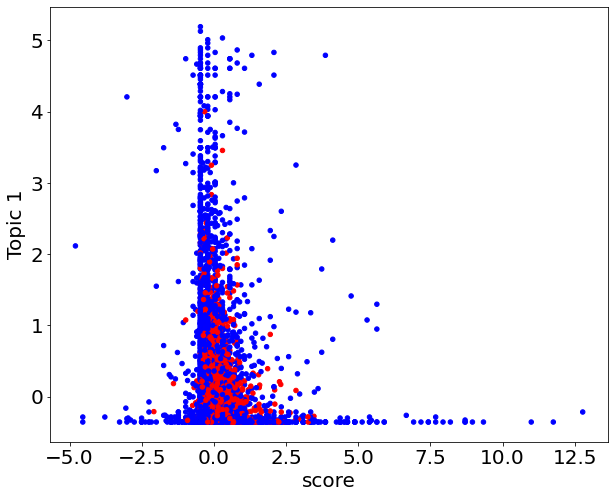

In [18]:
#A2b.
col = pmdf.tenure.map({0.0:'r', 1.0:'b'})
pmdf.plot.scatter(x='score',y='Topic 1', c=col)

##Q2c. Create a dataframe X, which includes all features but tenure. [5 points]

In [19]:
#A2c.
X = pmdf.drop(columns=['tenure'])

##Q2d. Run PCA on X with n_components = 10 (10 components) [10 points]

Text(0, 0.5, '2PC')

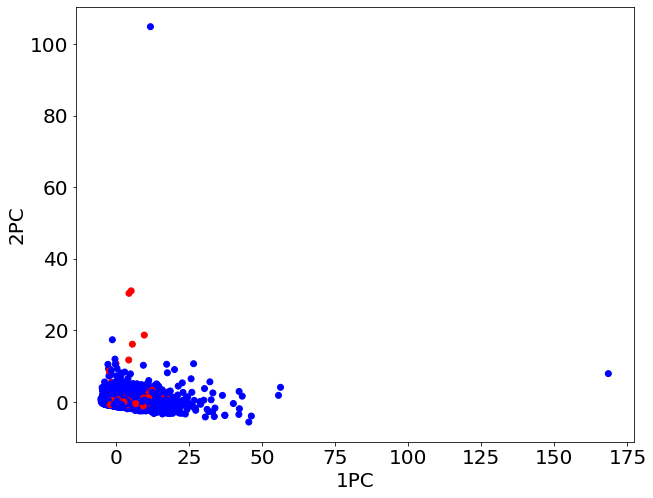

In [20]:
#A2d.
from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
pca.fit(X)
T = pca.transform(X)

plt.scatter(T[:,0], T[:,1],c=col)
plt.xlabel('1PC')
plt.ylabel('2PC')

##Q2e. Create a graph showing the cumulative explained variance with 10 components. What is the cumulative explained variance? [10 points]

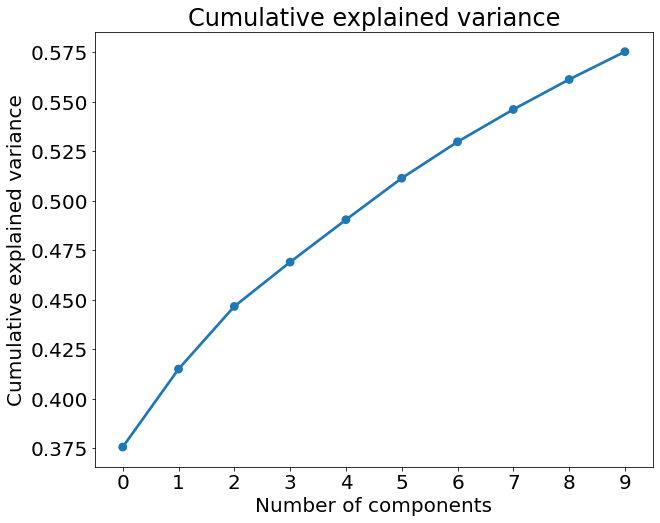

In [21]:
#A2e.
n_components = 10
for i in range(0, n_components):
    X['PC' + str(i + 1)] = T[:, i]

#this package will allow us to produce some better graphs
import seaborn as sns

# Do a scree plot
ind = np.arange(0, n_components)

(fig, ax) = plt.subplots(figsize=(10, 8))
sns.pointplot(x=ind, y=np.cumsum(pca.explained_variance_ratio_))
ax.set_title('Cumulative explained variance')
ax.set_xlabel('Number of components')
ax.set_ylabel('Cumulative explained variance')
plt.show()

##Q2f. Create a scree graph for this PCA. Which component explains the most variance? [10 points]

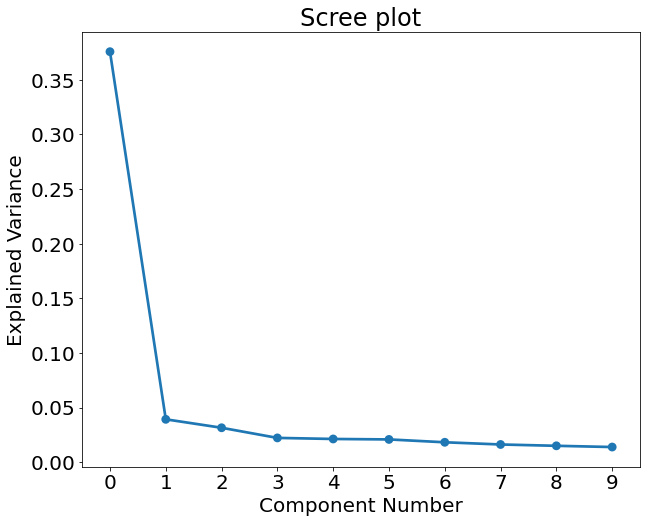

In [22]:
#Q2f.
(fig, ax) = plt.subplots(figsize=(10, 8))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

#Kmeans

##Q3a. First, load the wine quality sklearn dataset:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

##After you do that, load the wine data into x [5 points]

In [23]:
#A3a.
from sklearn.datasets import load_wine
wine = load_wine()
x = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])
list(wine.target_names)

['class_0', 'class_1', 'class_2']

##Q3b. Find the best K for this dataset. To do so, you should use the elbow method. What is the best K? [10 points]


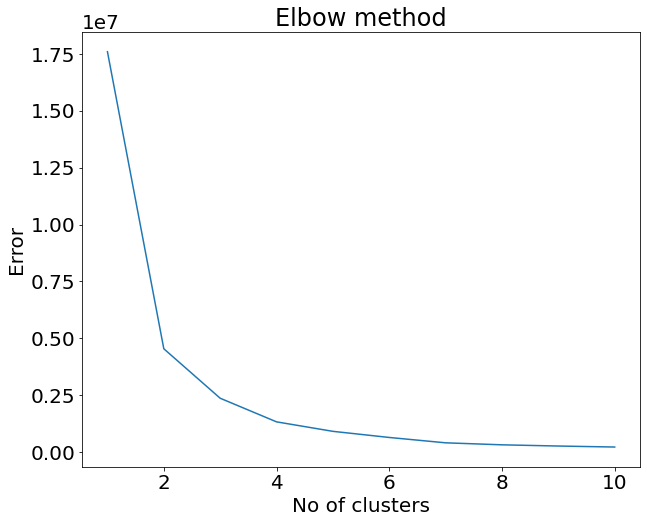

[[1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]
 [1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 2 1 2 2 1 1 1 2 2 0
 1 2 2 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 1 2 1 2 2 2 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1
 1 2 2 2 2 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2]


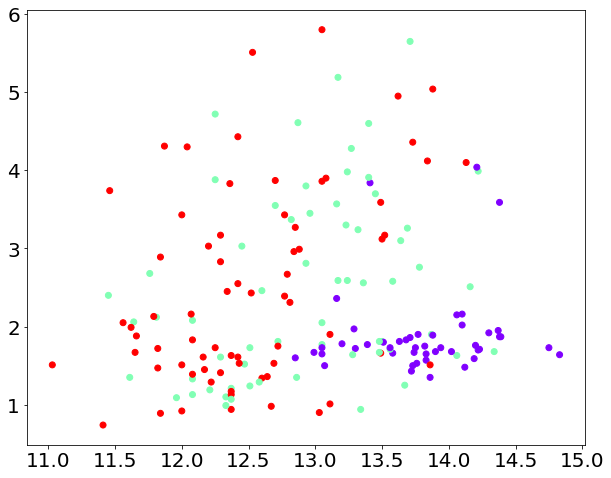

In [24]:
#A3b.
from sklearn.cluster import KMeans
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    #inertia_float:Sum of squared distances of samples to their closest cluster center
    #remember the explanation of K-means as the average between the points
    #the lower the error, the better
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

x = x[x.columns[:-1]].values
kmeans3 = KMeans(n_clusters=3)
y_kneas3 = kmeans3.fit(x)
print(y_kneas3.cluster_centers_)
k_means_test = y_kneas3.predict(x)
print(k_means_test)
plt.scatter(x[:,0],x[:,1],c=k_means_test, cmap='rainbow')

#Q3c. Looking at the dataset, does the K you found in Q3b make sense? Explain why you think this K makes sense givne this dataset. [10 points]

A3c.
The K found in Q3b makes sense because the target for the dataset describes 3 different classes: 'class_0', 'class_1', 'class_2'. 

##Q3d. Create a hierarchical agglomerative cluster using the same data. The cluster should have a k=3, euclidean affinity, and Ward linkage. 

##Plot a dendogram of the cluster using scipy.cluster.hierarchy. 

##Plot a scatter diagram of the agglomerative cluser. [10 Points]

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

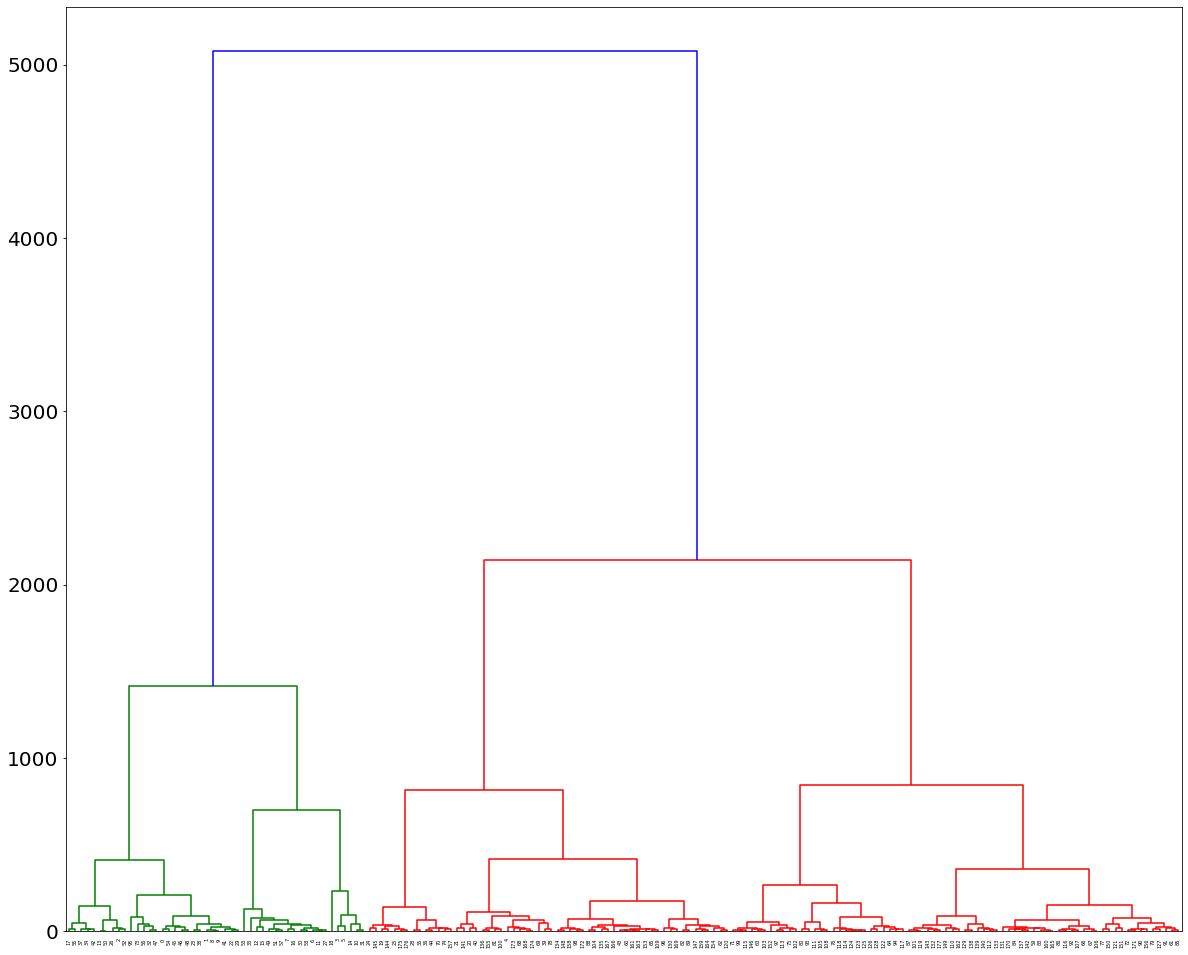

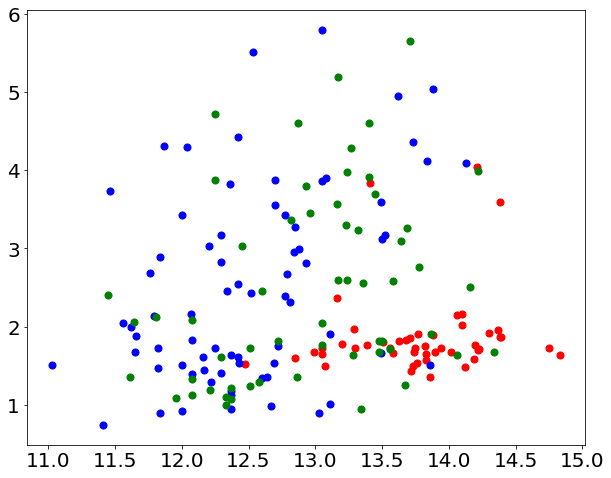

In [25]:
#A3d.
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
clustering.fit(x)
clustering_class = clustering.fit_predict(x)

display(clustering_class)
labels = clustering.labels_

plt.figure(figsize=(20,17))
dend = sch.dendrogram(sch.linkage(x, method='ward'))
plt.show()

plt.scatter(x[labels==0, 0], x[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(x[labels==1, 0], x[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(x[labels==2, 0], x[labels==2, 1], s=50, marker='o', color='green')